# Load data 

In [6]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from parse_logs.parse_base import LogDir
from parse_logs.parse_experiment_results import parse_experiment_result
from parse_logs.parse_coordinator_logs import read_design

sns.set(rc={"figure.figsize":(16, 8)})
# parser.root_data_path = '../tests/data'
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

LogDir.base_data_path = '../data'
trial_run_objects = parse_experiment_result(exec_code='experiment_2021_07_29_15_33_17_run_1')

# load trials run to dict (it can take a while)
trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]

ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"


In [9]:
# sort and instantiate a dataframe
trial_run_dicts.sort(key=lambda tr: tr['scenario_id'])
trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,exec_group,scenario_id,code,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors
0,les-05,1,aaaaap,None,437.18,NaN,success,None,False,{}
1,les-05,1,aaaaab,None,NaN,2700.41,timeout-wall,None,True,{}
2,les-04,1,aaaaap,None,409.42,NaN,success,None,False,{}
3,les-04,1,aaaaab,None,NaN,217.17,low-battery,None,True,{}
4,les-03,1,aaaaap,None,428.87,NaN,success,None,False,{}
...,...,...,...,...,...,...,...,...,...,...
1129,les-06,81,accccp,None,NaN,901.00,timeout-sim,None,True,{}
1130,les-01,81,accccb,None,216.83,NaN,success,None,False,{}
1131,les-01,81,accccp,None,173.07,NaN,success,None,False,{}
1132,les-07,81,accccb,None,217.33,NaN,success,None,False,{}


In [24]:


from parse_logs.parse_coordinator_logs import get_flat_design
from flatten_json import flatten


exp_design = get_flat_design(exec_code='experiment_2021_07_29_15_33_17_run_1')
td_df = pd.DataFrame.from_records(exp_design)
td_df = td_df.set_index('code')

td_df

,scenario_id,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
code,,,,,,,
aaaaab,1,a,a,a,a,a,baseline
aaaaap,1,a,a,a,a,a,planned
aaaabb,2,a,a,a,b,a,baseline
aaaabp,2,a,a,a,b,a,planned
aaaacb,3,a,a,a,c,a,baseline
...,...,...,...,...,...,...,...
acccap,79,a,c,c,a,c,planned
acccbb,80,a,c,c,b,c,baseline
acccbp,80,a,c,c,b,c,planned


In [33]:
trial_run_df  = trial_run_df.drop(['treatment', 'factors'], axis=1).join(td_df.drop(['scenario_id'], axis=1), on='code', lsuffix='_left', rsuffix='_right')


## Baseline

In [34]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,exec_group,scenario_id,code,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
1,les-05,1,aaaaab,NaN,2700.41,timeout-wall,None,True,a,a,a,a,a,baseline
3,les-04,1,aaaaab,NaN,217.17,low-battery,None,True,a,a,a,a,a,baseline
5,les-03,1,aaaaab,NaN,218.97,low-battery,None,True,a,a,a,a,a,baseline
7,les-08,1,aaaaab,NaN,220.02,low-battery,None,True,a,a,a,a,a,baseline
9,les-06,1,aaaaab,NaN,232.25,low-battery,None,True,a,a,a,a,a,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,les-03,81,accccb,223.37,NaN,success,None,False,a,c,c,c,c,baseline
1126,les-08,81,accccb,222.02,NaN,success,None,False,a,c,c,c,c,baseline
1128,les-06,81,accccb,214.35,NaN,success,None,False,a,c,c,c,c,baseline
1130,les-01,81,accccb,216.83,NaN,success,None,False,a,c,c,c,c,baseline


# Planned

In [35]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,exec_group,scenario_id,code,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
0,les-05,1,aaaaap,437.18,NaN,success,None,False,a,a,a,a,a,planned
2,les-04,1,aaaaap,409.42,NaN,success,None,False,a,a,a,a,a,planned
4,les-03,1,aaaaap,428.87,NaN,success,None,False,a,a,a,a,a,planned
6,les-08,1,aaaaap,479.20,NaN,success,None,False,a,a,a,a,a,planned
8,les-06,1,aaaaap,425.70,NaN,success,None,False,a,a,a,a,a,planned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,les-03,81,accccp,NaN,901.0,timeout-sim,None,True,a,c,c,c,c,planned
1127,les-08,81,accccp,175.82,NaN,success,None,False,a,c,c,c,c,planned
1129,les-06,81,accccp,NaN,901.0,timeout-sim,None,True,a,c,c,c,c,planned
1131,les-01,81,accccp,173.07,NaN,success,None,False,a,c,c,c,c,planned


In [36]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

269.59837782340855

In [41]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.exec_group == 'les-01']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-03']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-04']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-05']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-06']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-07']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-08']['ttc'].mean())

(279.3969014084508,
 263.37656716417905,
 270.1132857142858,
 267.57041095890406,
 270.819696969697,
 265.1230882352941,
 270.3883333333334)

In [48]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
[(planned_df[planned_df.factors_battery_charge == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_location == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_skills == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'c']['ttc'].mean())]

[(279.61149068322965, 263.738282208589, 265.5682208588957),
 (277.6638235294115, 278.859642857143, 249.95395973154362),
 (417.40366412213746, 239.63849162011186, 190.50418079096045),
 (277.6638235294115, 278.859642857143, 249.95395973154362),
 (308.4571875000002, 244.89048780487806, 256.3142331288344)]

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [49]:
by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
low-battery   baseline      84
              planned       30
no-skill      baseline     155
success       baseline     310
              planned      487
timeout-sim   baseline      15
              planned       40
timeout-wall  baseline       3
              planned       10
Name: end_state, dtype: int64

In [51]:
trial_run_df.groupby(['scenario_id', 'code', 'treatment'])['end_state'].value_counts()

scenario_id  code    treatment  end_state   
1            aaaaab  baseline   low-battery     6
                                timeout-wall    1
             aaaaap  planned    success         7
2            aaaabb  baseline   no-skill        7
             aaaabp  planned    success         6
                                               ..
80           acccbp  planned    success         6
                                timeout-sim     1
81           accccb  baseline   success         7
             accccp  planned    success         5
                                timeout-sim     2
Name: end_state, Length: 229, dtype: int64

## Planned

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-sim'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='scenario_id'>],
      dtype=object)

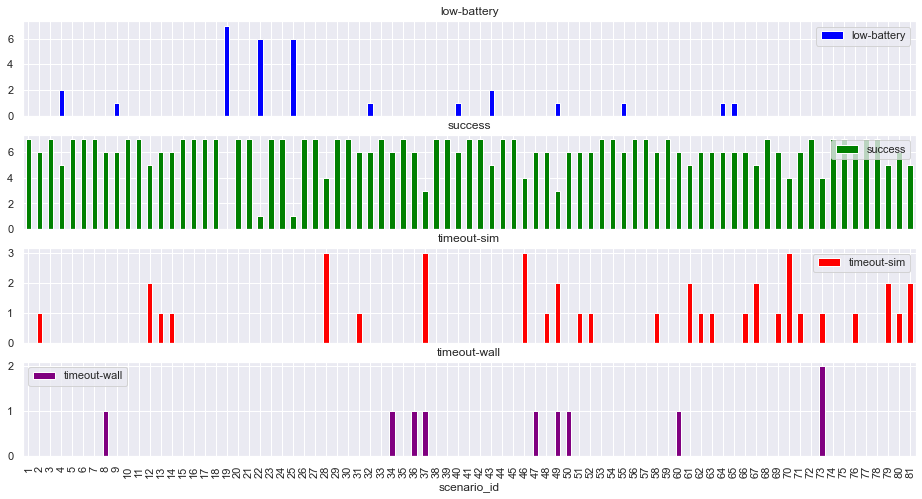

In [55]:
planned_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True, 
                                                                              color={"success": "green", 
                                                                                     "failure-bt": "orange",
                                                                                     "low-battery": "blue",
                                                                                     "timeout-wall": "purple", 
                                                                                     "timeout-sim": "red" })

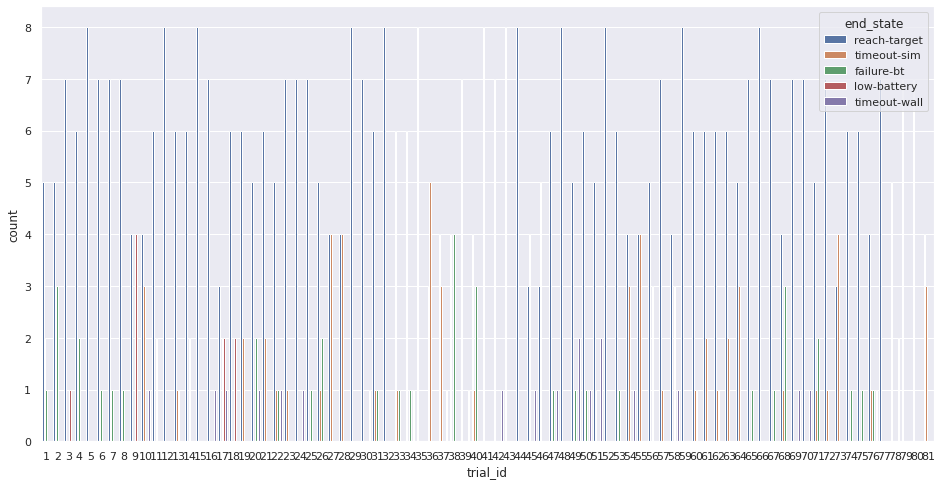

In [11]:
ax_planned = sns.countplot(x='scenario_id', hue="end_state", data=planned_df)

## Baseline

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'no-skill'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-sim'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='scenario_id'>],
      dtype=object)

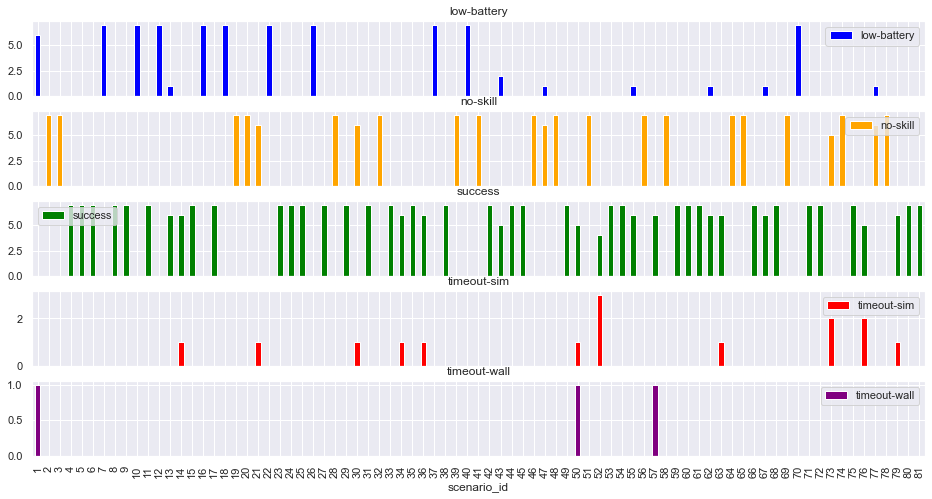

In [57]:
baseline_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True,
                                                                               color={"success": "green", 
                                                                                      "no-skill": "orange", 
                                                                                      "timeout-sim": "red",
                                                                                      "low-battery": "blue",
                                                                                      "timeout-wall": "purple"})

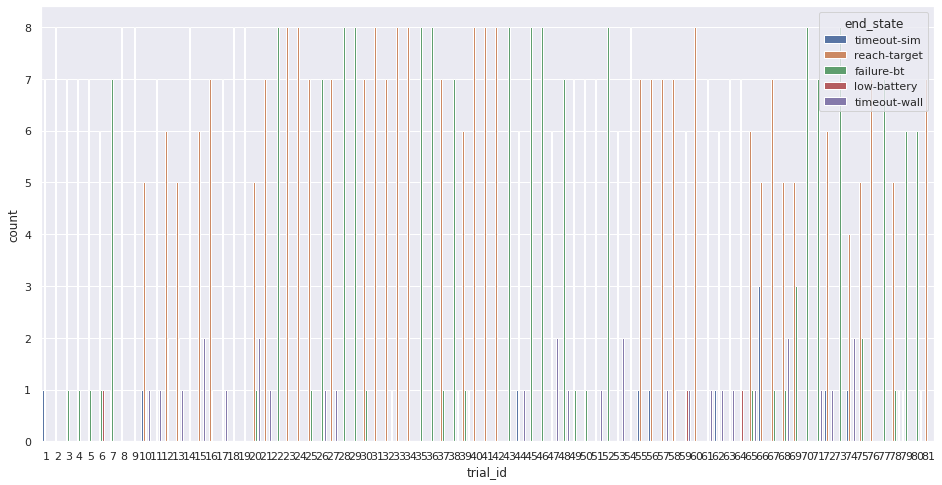

In [13]:
ax_baseline = sns.countplot(x='scenario_id', hue="end_state", data=baseline_df)

## Time to Conclusion

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

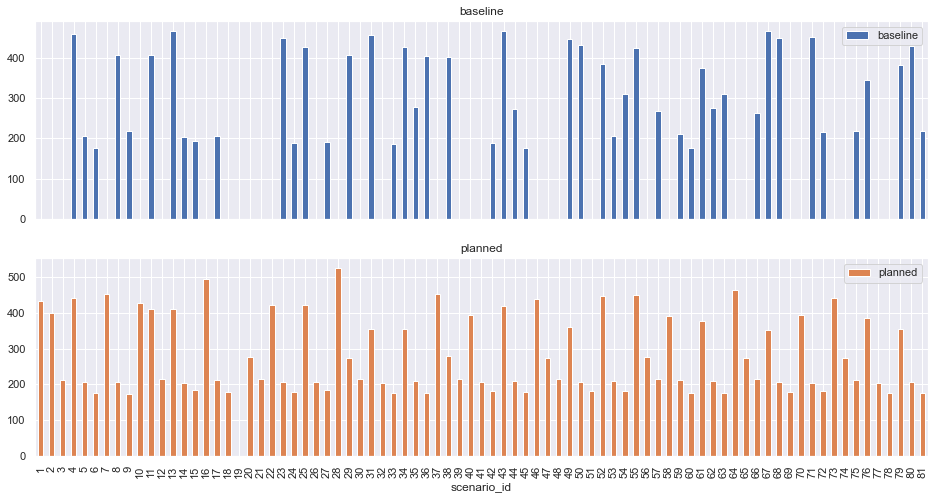

In [59]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='trial_id'>

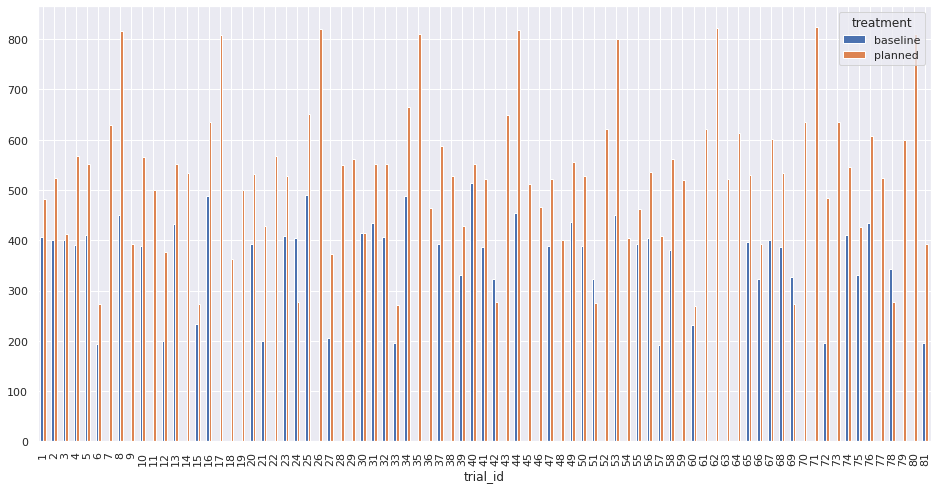

In [15]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))

## STD

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

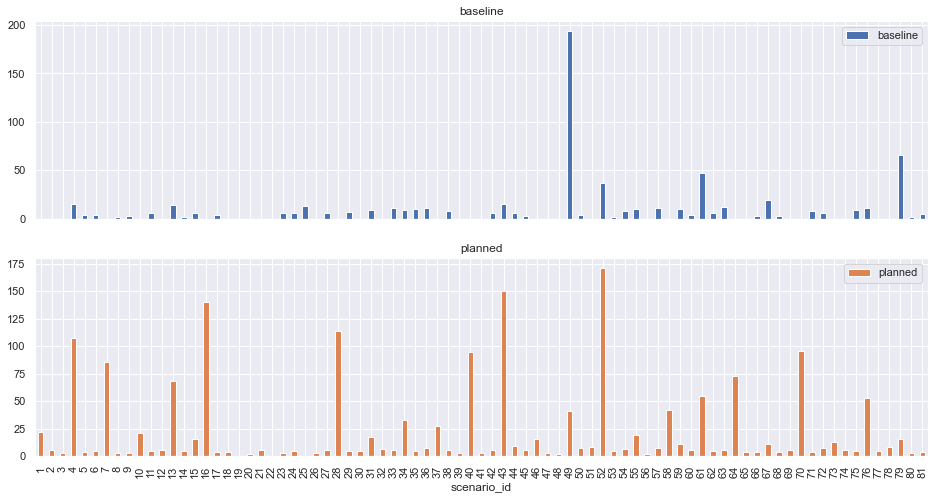

In [60]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id'>

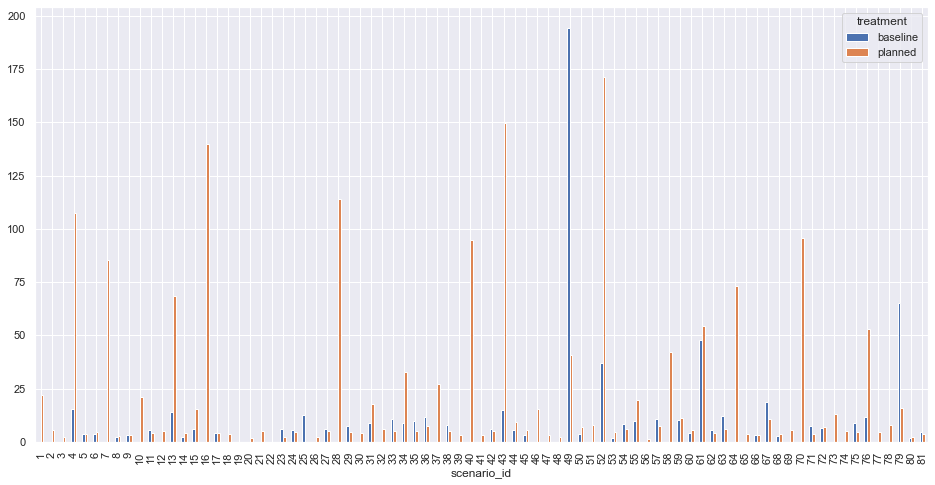

In [61]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(legend=True)

In [18]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack()

treatment,baseline,planned
trial_id,,
1,70.315316,35.535140
2,6.405857,27.539697
3,12.484521,29.766700
4,16.536706,22.158203
5,10.455893,54.583108
...,...,...
77,NaN,39.496926
78,26.858202,7.854047
79,NaN,20.747784


# Plots

## Successes per trial

In [64]:
successes = trial_run_df[trial_run_df.end_state == "success"]

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

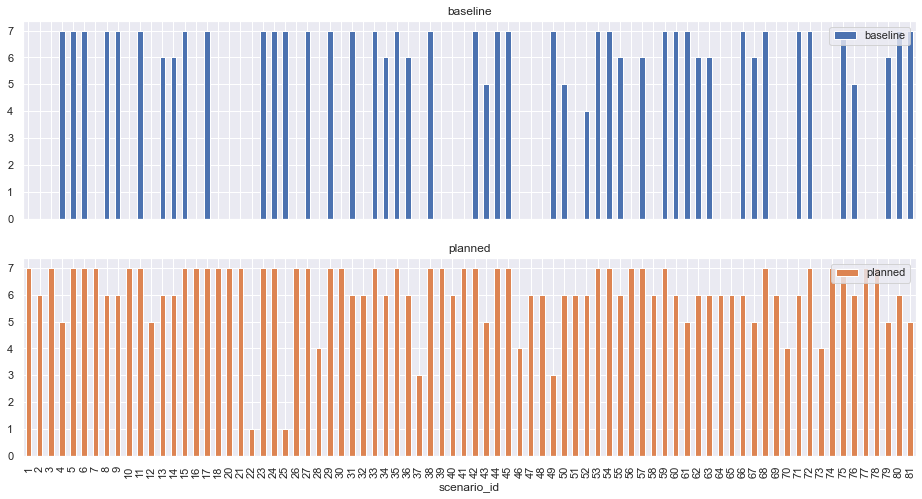

In [65]:
successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id'>

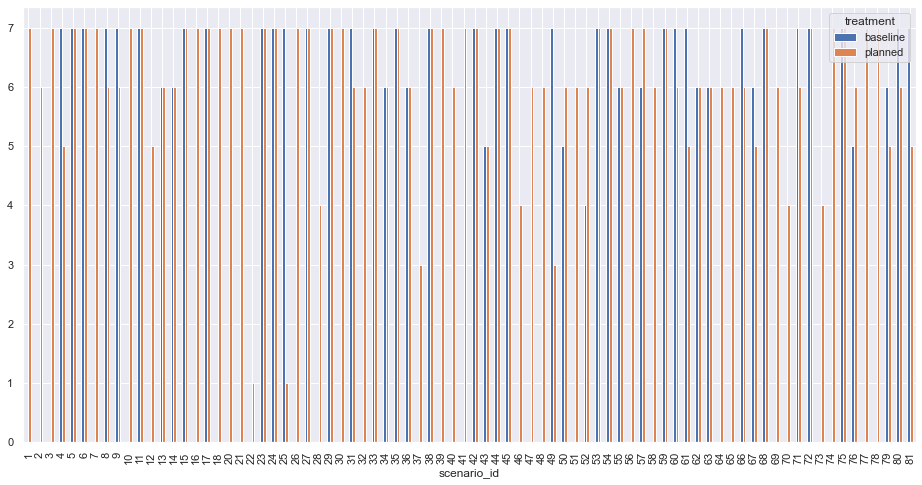

In [66]:
successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack().plot.bar(legend=True)

### Average time to reach target

<AxesSubplot:xlabel='scenario_id'>

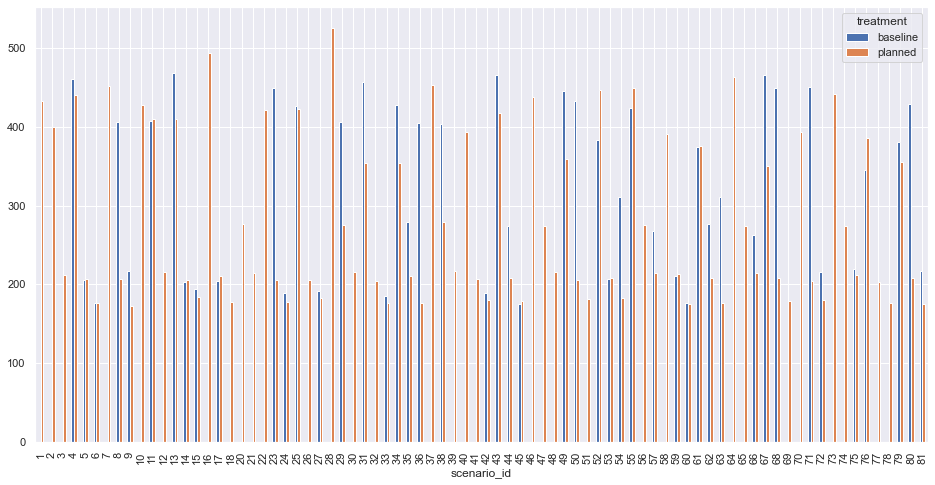

In [68]:
successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

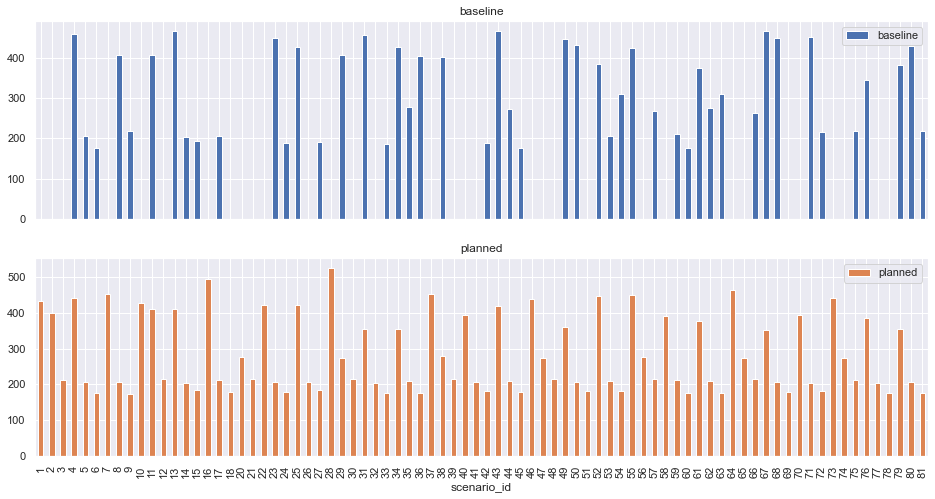

In [70]:
successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True, figsize=(16,8))

# Factors

In [72]:
trial_run_df.groupby(["factors_avg_speed", "treatment"])["end_state"].value_counts()

factors_avg_speed  treatment  end_state   
a                  baseline   success         310
                              no-skill        155
                              low-battery      84
                              timeout-sim      15
                              timeout-wall      3
                   planned    success         487
                              timeout-sim      40
                              low-battery      30
                              timeout-wall     10
Name: end_state, dtype: int64

In [73]:
trial_run_df.groupby(["factors_battery_charge", "treatment"])["end_state"].value_counts()

factors_battery_charge  treatment  end_state   
a                       baseline   success          96
                                   low-battery      56
                                   no-skill         34
                                   timeout-sim       2
                                   timeout-wall      1
                        planned    success         161
                                   low-battery      22
                                   timeout-sim       5
                                   timeout-wall      1
b                       baseline   success         103
                                   no-skill         61
                                   low-battery      17
                                   timeout-sim       7
                                   timeout-wall      1
                        planned    success         163
                                   timeout-sim      15
                                   timeout-wall      6
                 

In [74]:
trial_run_df.groupby(["factors_battery_discharge_rate", "treatment"])["end_state"].value_counts()

factors_battery_discharge_rate  treatment  end_state   
a                               baseline   success         120
                                           no-skill         48
                                           low-battery      15
                                           timeout-sim       4
                                           timeout-wall      2
                                planned    success         170
                                           timeout-sim      10
                                           low-battery       5
                                           timeout-wall      4
b                               baseline   success         100
                                           low-battery      53
                                           no-skill         35
                                           timeout-sim       1
                                planned    success         168
                                           timeout-sim      15

In [75]:
trial_run_df.groupby(["factors_skills", "treatment"])["end_state"].value_counts()

factors_skills  treatment  end_state   
a               baseline   no-skill        107
                           success          47
                           low-battery      29
                           timeout-sim       4
                           timeout-wall      2
                planned    success         160
                           timeout-sim      15
                           low-battery      10
                           timeout-wall      4
b               baseline   success         119
                           no-skill         48
                           low-battery      17
                           timeout-sim       4
                           timeout-wall      1
                planned    success         164
                           low-battery      11
                           timeout-sim      11
                           timeout-wall      3
c               baseline   success         144
                           low-battery      38
                    

In [76]:
trial_run_df.groupby(["factors_location", "treatment"])["end_state"].value_counts()

factors_location  treatment  end_state   
a                 baseline   success          79
                             low-battery      60
                             no-skill         40
                             timeout-sim       9
                             timeout-wall      1
                  planned    success         131
                             low-battery      27
                             timeout-sim      26
                             timeout-wall      5
b                 baseline   success         115
                             no-skill         61
                             low-battery      10
                             timeout-sim       2
                             timeout-wall      1
                  planned    success         179
                             timeout-sim       5
                             timeout-wall      3
                             low-battery       2
c                 baseline   success         116
                           

## Time by factor

array([<AxesSubplot:title={'center':'baseline'}, xlabel='factors_battery_charge'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='factors_battery_charge'>],
      dtype=object)

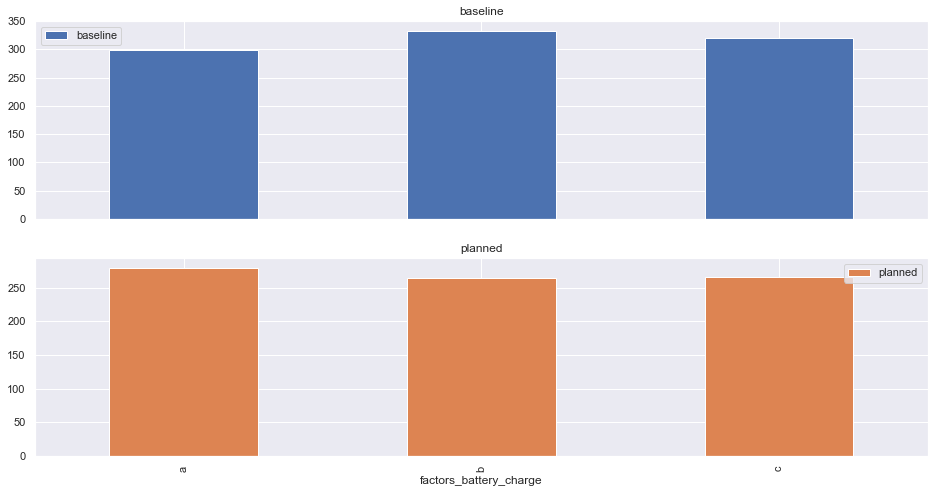

In [77]:
trial_run_df.groupby(["factors_battery_charge", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

array([<AxesSubplot:title={'center':'baseline'}, xlabel='factors_battery_discharge_rate'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='factors_battery_discharge_rate'>],
      dtype=object)

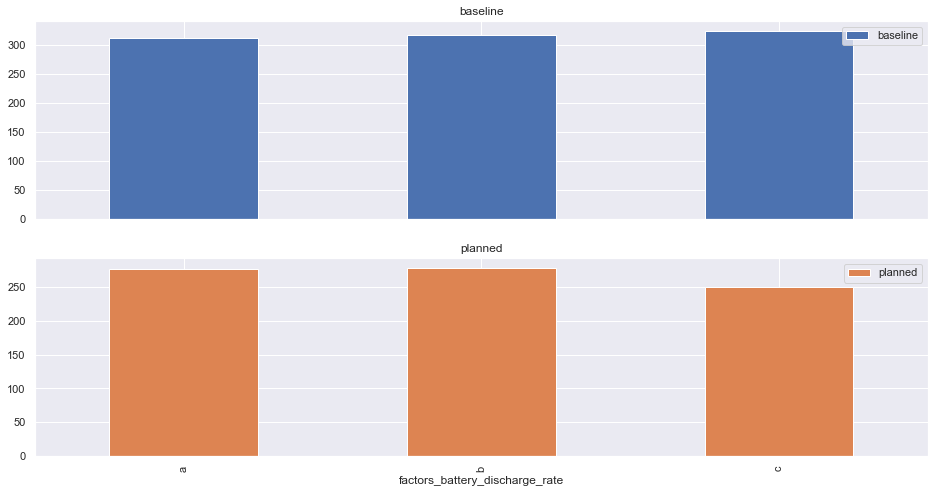

In [78]:
trial_run_df.groupby(["factors_battery_discharge_rate", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

array([<AxesSubplot:title={'center':'baseline'}, xlabel='factors_skills'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='factors_skills'>],
      dtype=object)

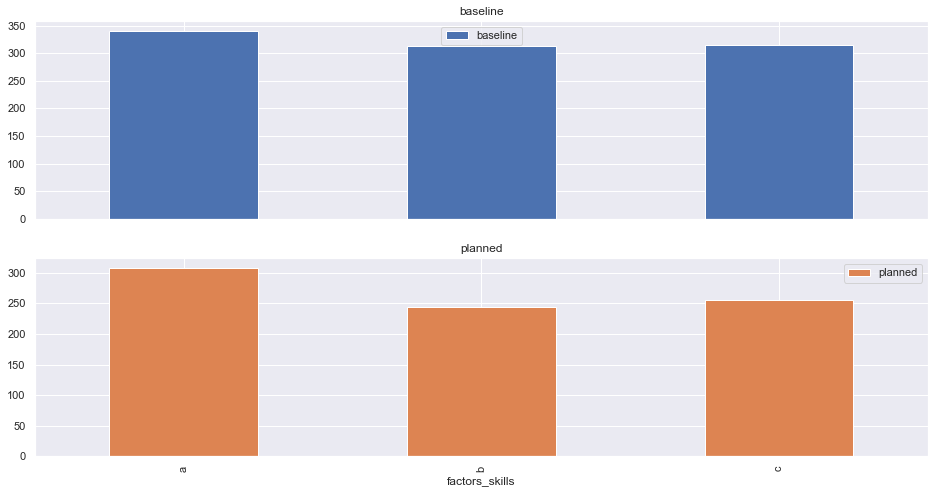

In [79]:
trial_run_df.groupby(["factors_skills", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

array([<AxesSubplot:title={'center':'baseline'}, xlabel='factors_location'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='factors_location'>],
      dtype=object)

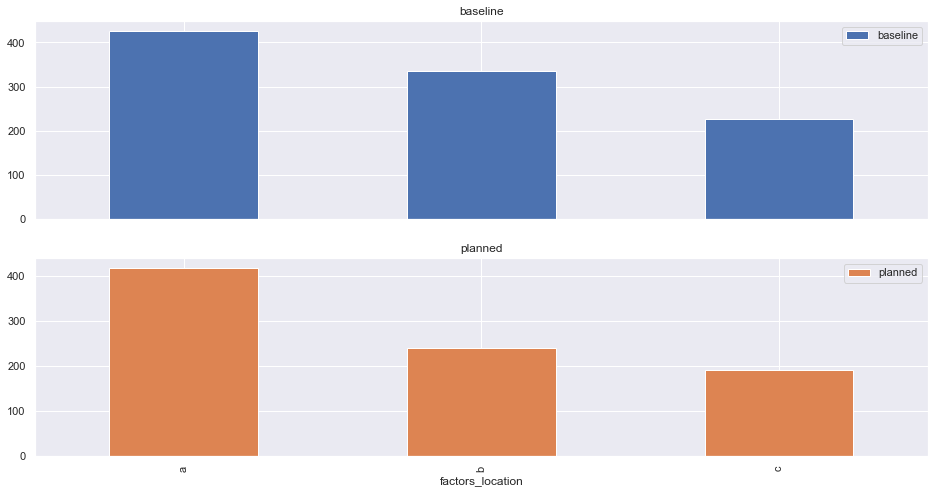

In [80]:
trial_run_df.groupby(["factors_location", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

# Metrics
## Metric1 - Success

In [81]:
planned_suc = successes[successes.treatment == "planned"].groupby("scenario_id")["end_state"].count()
baseline_suc = successes[successes.treatment == "baseline"].groupby("scenario_id")["end_state"].count()

In [82]:
metric1 = planned_suc/baseline_suc
metric1

scenario_id
1          NaN
2          NaN
3          NaN
4     0.714286
5     1.000000
        ...   
77         NaN
78         NaN
79    0.833333
80    0.857143
81    0.714286
Name: end_state, Length: 80, dtype: float64

<AxesSubplot:xlabel='scenario_id'>

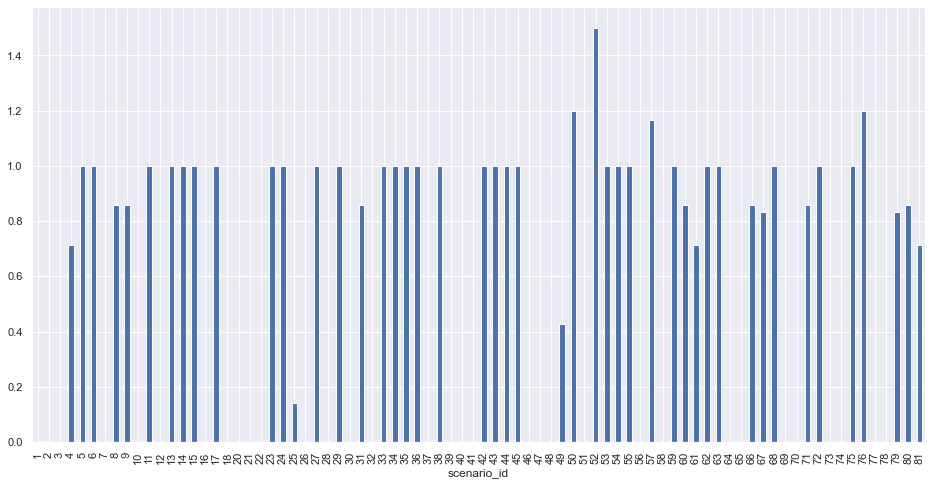

In [83]:
metric1.plot.bar(figsize=(16, 8))

In [84]:
metric1.mean()

0.9456940222897671

## Metric2 - TTC

In [95]:
planned_ttc = successes[successes.treatment == "planned"].groupby("scenario_id")["ttc"].mean()
baseline_ttc = successes[successes.treatment == "baseline"].groupby("scenario_id")["ttc"].mean()

In [96]:
metric2 = planned_ttc / baseline_ttc
metric2

scenario_id
1          NaN
2          NaN
3          NaN
4     0.956733
5     1.002893
        ...   
77         NaN
78         NaN
79    0.930984
80    0.484908
81    0.804440
Name: ttc, Length: 80, dtype: float64

<AxesSubplot:xlabel='scenario_id'>

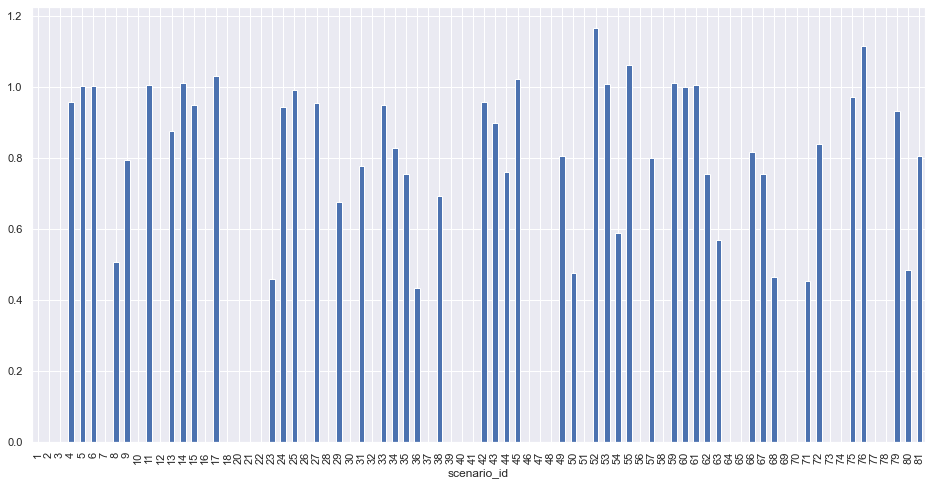

In [97]:
metric2.plot.bar(figsize=(16, 8))

In [98]:
metric2.mean()

0.8319776478792054

## Metric 3 - Battery

In [99]:
battery = trial_run_df[trial_run_df.end_state == "low-battery"]
battery.groupby("scenario_id")["end_state"].count()

scenario_id
1      6
4      2
7      7
9      1
10     7
12     7
13     1
16     7
18     7
19     7
22    13
25     6
26     7
32     1
37     7
40     8
43     4
47     1
49     1
55     2
62     1
64     1
65     1
67     1
70     7
77     1
Name: end_state, dtype: int64

In [100]:
planned_battery = battery[battery.treatment == "planned"].groupby("scenario_id")["end_state"].value_counts()
planned_battery

scenario_id  end_state  
4            low-battery    2
9            low-battery    1
19           low-battery    7
22           low-battery    6
25           low-battery    6
32           low-battery    1
40           low-battery    1
43           low-battery    2
49           low-battery    1
55           low-battery    1
64           low-battery    1
65           low-battery    1
Name: end_state, dtype: int64

In [101]:
baseline_battery = battery[battery.treatment == "baseline"].groupby("scenario_id")["end_state"].value_counts()
baseline_battery

scenario_id  end_state  
1            low-battery    6
7            low-battery    7
10           low-battery    7
12           low-battery    7
13           low-battery    1
16           low-battery    7
18           low-battery    7
22           low-battery    7
26           low-battery    7
37           low-battery    7
40           low-battery    7
43           low-battery    2
47           low-battery    1
55           low-battery    1
62           low-battery    1
67           low-battery    1
70           low-battery    7
77           low-battery    1
Name: end_state, dtype: int64

In [102]:
metric3 = len(planned_battery) / len(baseline_battery)
metric3

0.6666666666666666